In [6]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

### Reduce dimensionality
We reduce the dimensionality to 2 dimensions using t-SNE decomposition.


In [7]:
# Load the embeddings
saved_file = "../data/Embedding_Issues.csv"
df = pd.read_csv(saved_file)

# Convert to a list of lists of floats
matrix = np.array(df.embedding.apply(eval).to_list())

print(matrix)

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

[[-0.00376557  0.00628769 -0.00127515 ...  0.00335696  0.00127603
   0.00642507]
 [-0.02049238  0.01674109 -0.01014321 ... -0.00494656  0.00290909
  -0.0575199 ]
 [ 0.00061685  0.01133278  0.01082629 ... -0.00645075 -0.00480817
  -0.02625322]
 ...
 [ 0.01422395  0.01920485 -0.02028297 ...  0.00672745  0.00123355
  -0.02952602]
 [ 0.01001691 -0.01513253 -0.0070447  ...  0.01154588 -0.01356784
  -0.02849317]
 [ 0.00170366  0.00248527 -0.00089599 ... -0.00141044 -0.01462547
  -0.03902951]]


(111, 2)

### Plotting the embeddings
We colour each review by its star rating, ranging from red to green.

We can observe a decent data separation even in the reduced 2 dimensions.

[2 0 0 4 2 2 2 2 3 2 3 0 2 2 2 2 3 3 2 2 3 1 3 3 3 2 2 0 0 0 0 0 1 0 0 0 0
 2 3 0 2 0 2 3 1 3 0 0 0 0 0 0 0 0 0 0 2 0 0 0 3 1 0 0 3 0 1 0 3 4 4 4 2 2
 0 0 0 0 0 2 0 0 0 0 3 3 2 2 0 1 4 3 3 2 2 3 1 1 2 1 1 1 2 1 2 1 0 0 0 1 1]


Text(0.5, 1.0, 'Sizes visualized in language using t-SNE')

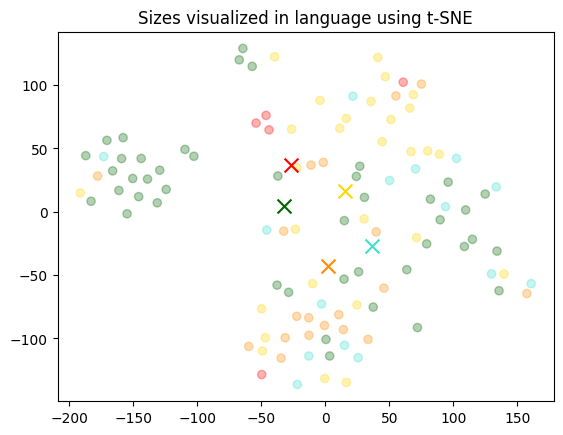

In [8]:
# Define colors and data
#
# Red: XL
# Dark Orange: L
# Gold: M
# Turquoise: S
# Dark Green: XS
#
colors = ["darkgreen", "turquoise", "gold", "darkorange", "red"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

df['Size_int'] = df['Size'].map({'XS': 0, 'S': 1, 'M': 2, 'L': 3, 'XL': 4})
color_indices = df.Size_int.values
print(df.Size_int.values)

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)

for score in [0, 1, 2, 3, 4]:
    avg_x = np.array(x)[df.Size_int == score].mean()
    avg_y = np.array(y)[df.Size_int == score].mean()

    color = colors[score]
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

plt.title("Sizes visualized in language using t-SNE")